<a href="https://colab.research.google.com/github/naokityokoyama/Machine_Learning/blob/master/Machine_Learning_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Leanning usando Naive-Bayes
modelo supervisionado do sklearn usando probabilidade

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder  
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
credito = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/credit.csv')

In [ ]:
credito.shape

(1000, 21)

In [ ]:
credito.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


Separando as colunas como Atributos e classe 

In [ ]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

Instanciando o Lavelencoder 

In [ ]:
#instanciando labelencoder
labelencoder = LabelEncoder()

Tranformando de qualitativo para quantitativo

In [ ]:
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [ ]:
#criando variaveis de treino e teste 
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state = 0)


In [ ]:
print (f'x_treinamento={len(x_treinamento)}, x_teste={len(x_teste)}, y_treinamento={len(y_treinamento)}, y_teste={len(x_teste)}')

x_treinamento=700, x_teste=300, y_treinamento=700, y_teste=300


Naive Bayes / treino

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento) 


GaussianNB(priors=None, var_smoothing=1e-09)

Previsões

In [ ]:
previsoes = naive_bayes.predict(x_teste)  

In [ ]:
confusao = confusion_matrix(y_teste, previsoes )  

In [ ]:
taxa_de_acerto = accuracy_score(y_teste, previsoes)
taxa_de_erro = 1-taxa_de_acerto

In [ ]:
print (f'A acuracia desse modelo foi de {round(taxa_de_acerto*100,2)} % / Taxa de erro foi de {round(taxa_de_erro*100,2)} %')

A acuracia desse modelo foi de 61.33 % / Taxa de erro foi de 38.67 %


## modelo na Yellowbrick

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.6133333333333333

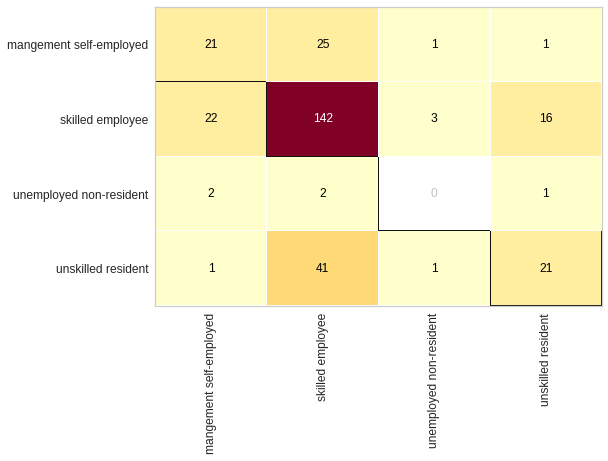

In [ ]:
visualizador = ConfusionMatrix(GaussianNB()) 
visualizador.fit(x_treinamento, y_treinamento) 
visualizador.score(x_teste, y_teste) 
